<a href="https://colab.research.google.com/github/Madhankumar-2001/Codsoft_machine-learning/blob/main/Genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_path = "https://drive.google.com/file/d/1ivdV5SyJYaLEDc8m3PN6KSv6UNcLoiZb/view?usp=drive_link"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [ ]:
print(train_data.describe())

       Genre  Description
count    0.0          0.0
mean     NaN          NaN
std      NaN          NaN
min      NaN          NaN
25%      NaN          NaN
50%      NaN          NaN
75%      NaN          NaN
max      NaN          NaN


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        125 non-null    object 
 1   Genre        0 non-null      float64
 2   Description  0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


In [ ]:
print(train_data.isnull().sum())


Title            0
Genre          125
Description    125
dtype: int64


In [ ]:
# Load the test data
test_path = "https://drive.google.com/file/d/1EG7eQIu4HrJg5z6vSGyeL4i_SbBac5XB/view?usp=drive_link"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head()

,Id,Title,Description
0,"<!DOCTYPE html><html><head><script nonce=""XdW8...",NaN,NaN
1,window['_DRIVE_VIEWER_IVIS'] = document.visibi...,NaN,NaN
2,"</script><meta property=""og:title"" content=""te...",NaN,NaN
3,try{,NaN,NaN
4,_._F_toggles_initialize=function(a){(typeof gl...,NaN,NaN


<ipython-input-23-a17b3d7dc09c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
<ipython-input-23-a17b3d7dc09c>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')


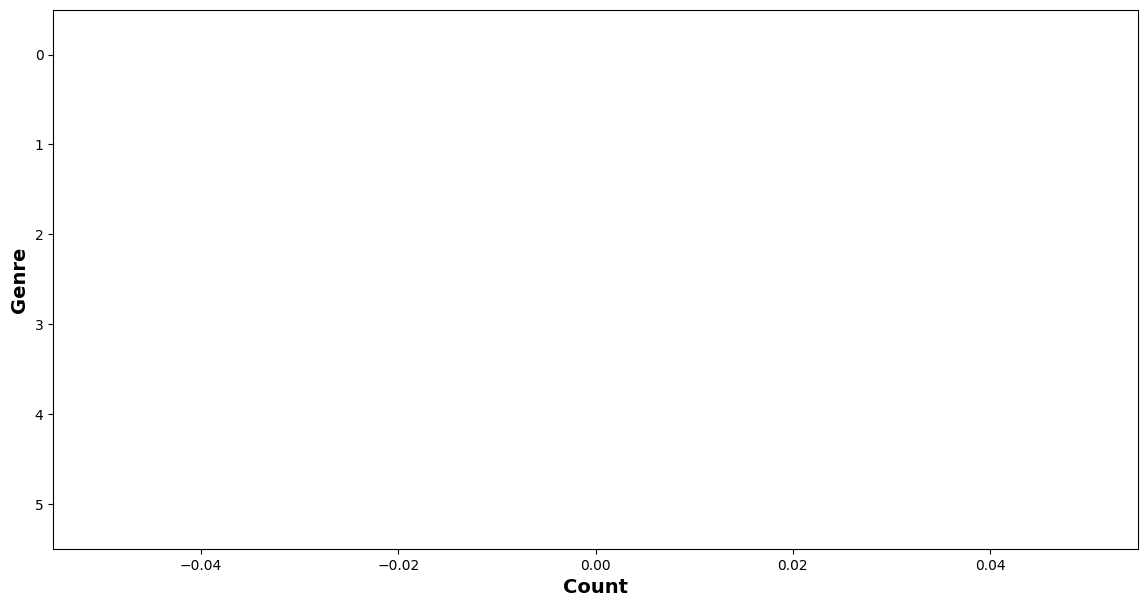

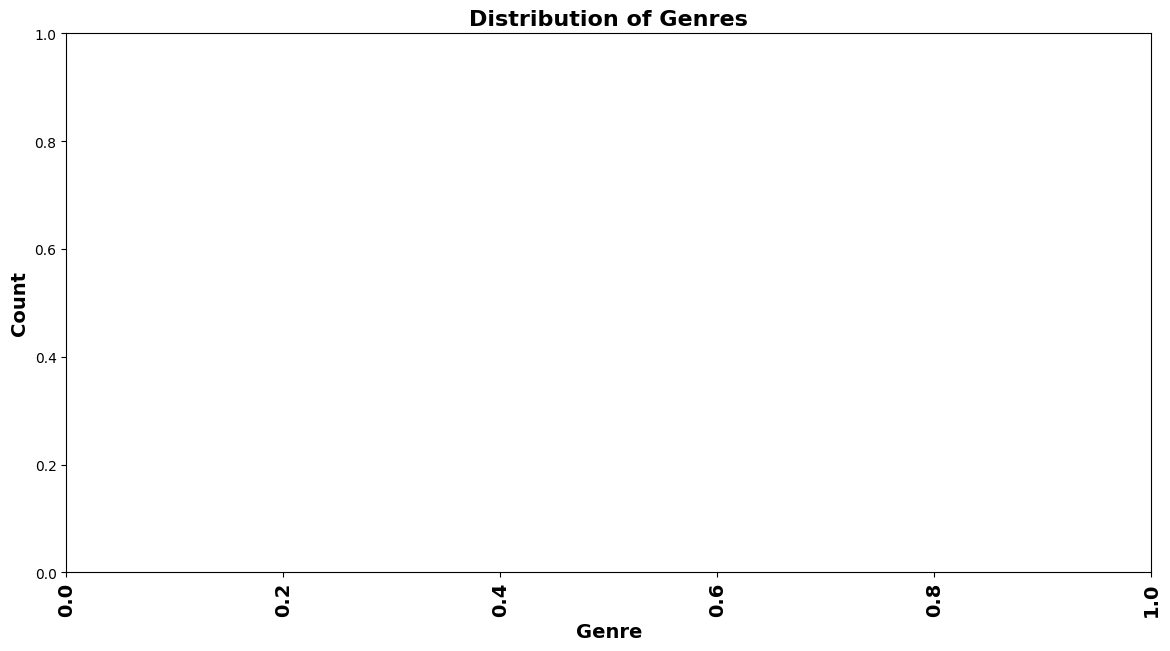

In [ ]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')  # Download the 'punkt' resource for sentence tokenization
nltk.download('stopwords')
import re
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    # Handle potential float values
    if isinstance(text, float):
        text = str(text)  # Convert float to string if necessary

    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


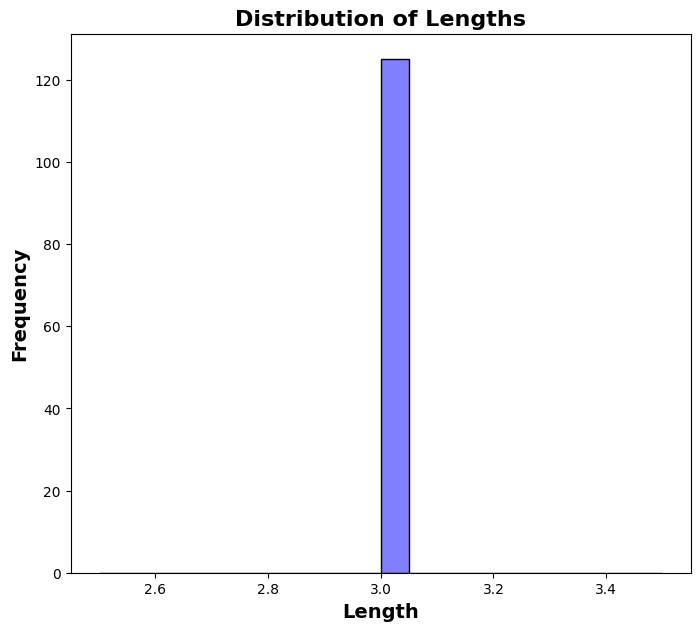

In [ ]:
# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

0


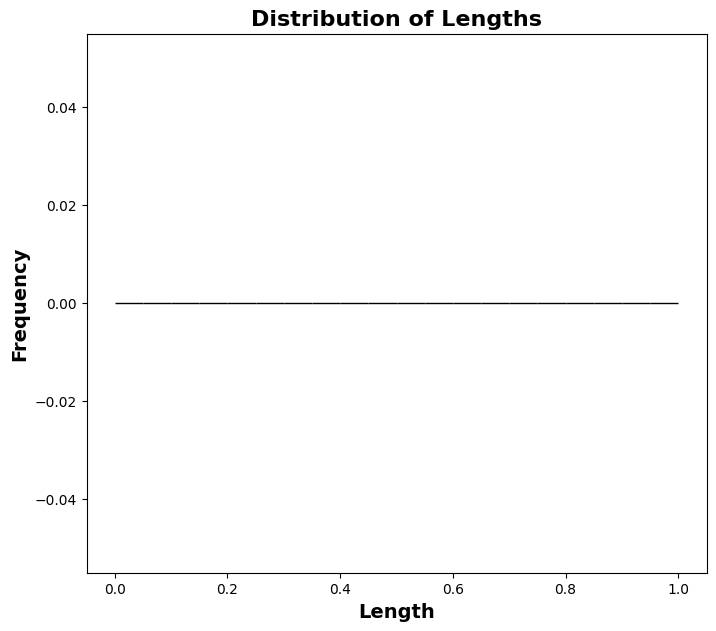

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
print(train_data['Genre'].isnull().sum())

# Handle missing values (fill with 'Unknown')
train_data['Genre'].fillna('Unknown', inplace=True)

# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)

# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

# Split the data into training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

In [ ]:
test_data.to_csv('https://drive.google.com/file/d/1RqthGHQ_UxgrH5w65zS9WK0TQzSe_Kla/view?usp=sharing', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

                                                    Id  Title  Description  \
0    <!DOCTYPE html><html><head><script nonce="XdW8...    NaN          NaN   
1    window['_DRIVE_VIEWER_IVIS'] = document.visibi...    NaN          NaN   
2    </script><meta property="og:title" content="te...    NaN          NaN   
3                                                 try{    NaN          NaN   
4    _._F_toggles_initialize=function(a){(typeof gl...    NaN          NaN   
..                                                 ...    ...          ...   
120  var Ij=function(a,b,c){a<b?Hj(a+1,b):_.Jd.log(...    NaN          NaN   
121                     }catch(e){_._DumpException(e)}    NaN          NaN   
122                                    })(this.gbar_);    NaN          NaN   
123                                     // Google Inc.    NaN          NaN   
124  </script><script nonce="XdW8KuWtjnIel1l9OOfBIQ...    NaN          NaN   

    Text_cleaning  
0             nan  
1             nan  
2  